# Decoding ML 2.0 Day 3
**Click on `Copy to Drive`, to copy this colab notebook to your drive.**

## Model evaluation metrics for a simple Linear Regression model.

In [ ]:
# importing warning library
import warnings
warnings.simplefilter('ignore') # to ignore warningsa

# importing required libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


# reading data
'''Linear Regression'''
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')

'''KNN'''
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target  # 0 setosa, 1 versicolor and 2 for virginica

# For Linear Regression
X = df[["sqft_living15"]]
y = df["price"]

# For KNN
X_iris = df_iris[["petal width (cm)"]]
y_iris = df_iris["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=0)

'''Linear Regression'''
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the values
y_pred = regressor.predict(X_test)

'''KNN'''
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train_iris, y_train_iris)

# Predicting the Test set results
y_pred_iris = classifier.predict(X_test_iris)

### What is an error?
The error of an observation is the deviation of the observed value from the true value of a quantity of interest. 
### What is a residual?
The residual is the difference between the observed value and the estimated value of the quantity of interest.

###Mean Squared Error (MSE) 
The mean squared error is the average of the squared differences between the actual and predicted values.  
It is calculated as  
$\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared error = {mse:.2f}")

Mean Squared error = 77112590873.13


### Root Mean Squared Error (RMSE)
The root mean squared error is the square root of the average of the squared differences between the actual and predicted values.  
It is calculated as  
$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2}$.

In [ ]:
rmse = math.sqrt(mse)
print(f"Root Mean Squared error = {rmse:.2f}")

Root Mean Squared error = 277691.54


### Mean Absolute Error (MAE) 
The mean absolute error is the average of the absolute differences between the actual and predicted values. 
It is calculated as  
$\frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y_i}|$

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute error = {mae:.2f}")

Mean Absolute error = 182206.10


### R-squared (R2)
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. The closer the value of R-squared to 1, the better is the model fitted.  
It is calculated as  
$R^2=1-\frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2 score = {r2:.2f}")

R2 score = 0.35


### Other techniques/metrics

**By visualizing residues**

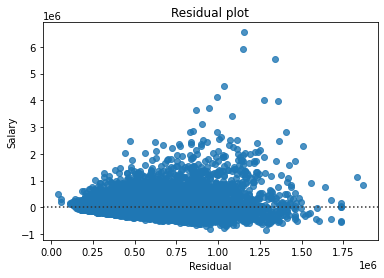

In [ ]:
# Predicting values
regressor1 = LinearRegression()
regressor1.fit(X, y)
y_pred2 = regressor1.predict(X)

sns.residplot(x=y_pred2, y=y)
plt.xlabel("Residual")
plt.ylabel("Salary")
plt.title("Residual plot")
plt.show()

**By Cross Validation**

In [ ]:
scores = cross_val_score(regressor, X, y, cv=5)
print(scores)

[0.35067142 0.32752725 0.37508287 0.38919363 0.26565068]


## Evaluating KNN

### Confusion Matrix

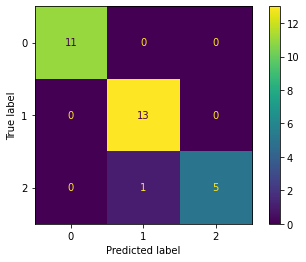

In [ ]:
# Computing confusion matrix
cm = confusion_matrix(y_test_iris, y_pred_iris)

# Plotting Confusion Matrix
plot = ConfusionMatrixDisplay(confusion_matrix=cm)
plot.plot()

### Accuracy
Ratio of correct predictions to the total number of predictions.  
$Accuracy = \frac{TP + TN}{TP+FP+TN+FN}$

In [ ]:
print(f"Accuracy = {accuracy_score(y_test_iris, y_pred_iris):.2f}")

Accuracy = 0.97


### Precision
Ratio of True Positives (TP) to the sum of True Positives (TP) and False Positives (FP).  
$ Precision = \frac{TP}{TP+FP}$

In [ ]:
print(f"Precision = {precision_score(y_test_iris, y_pred_iris, average = None)}")

Precision = [1.         0.92857143 1.        ]


### Recall
Ratio of True Positives (TP) to the sum of True Positives (TP) and False Negatives (FN).  
$Recall = \frac{TP}{TP+FN}$

In [ ]:
print(f"Recall = {recall_score(y_test_iris, y_pred_iris, average = None)}")

Recall = [1.         1.         0.83333333]


### F1 Score
$F_1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$

In [ ]:
print(f"F1 Score = {f1_score(y_test_iris, y_pred_iris, average = None)}")

F1 Score = [1.         0.96296296 0.90909091]
